In [4]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from omegaconf import OmegaConf

# Load config file directly
config = OmegaConf.load("../config/main.yaml")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load training dataset
from src.utils import load_data
import pandas as pd
from sklearn.model_selection import train_test_split

X = load_data("./data/final/X_train_final.csv")
X = X.loc[:, ~X.columns.str.contains("^Unnamed")]

y = load_data("./data/final/y_train_final.csv").squeeze("columns")

# --- 2) Train/valid split (stratified) ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_tr.shape, X_val.shape



((1244, 20), (312, 20))

## Model Evaluation

f1_train: 0.4912 using {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
f1_test: 0.39378238341968913


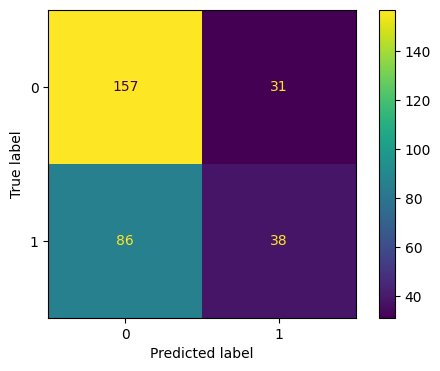

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       188
           1       0.55      0.31      0.39       124

    accuracy                           0.62       312
   macro avg       0.60      0.57      0.56       312
weighted avg       0.61      0.62      0.60       312



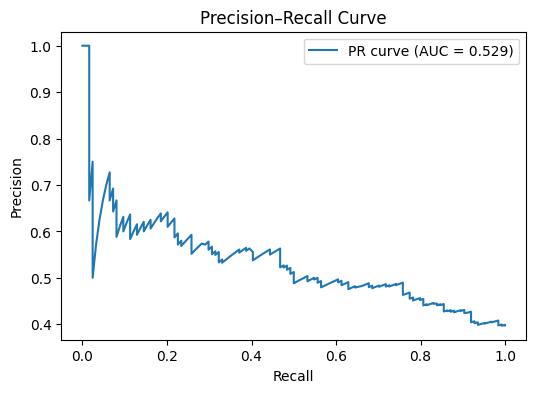

{'best_model': RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42),
 'best_params': {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200},
 'f1_train': 0.49120589836259726,
 'f1_test': 0.39378238341968913,
 'roc_auc': 0.6341154770075497,
 'auc_precision_recall': 0.528689043712367,
 'mean_precision': 0.506946415062765,
 'mean_recall': 0.5773324644292386}

In [7]:
# Run hyper_search on the split 
from sklearn.ensemble import RandomForestClassifier
from typing import Any, Mapping, Sequence

from src.train_model import hyper_search

estimator = RandomForestClassifier(random_state=42)
param_grid: Mapping[str, Sequence[Any]] = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

results = hyper_search(
    estimator=estimator,
    param_grid=param_grid,
    X_train=X_tr,
    y_train=y_tr,
    X_test=X_val,
    y_test=y_val,
    cv=5,
    plot_curve="prc"   # or "roc"
)

results